<a href="https://colab.research.google.com/github/GirishNaik711/Telescope_Particle_Prediction/blob/main/UCI_Tlscp_ParticleDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Following is a Project that is built to classify Particles using Machine Learning that are incident on a Atmospheric Telescope (The Cherenkov telescope).

Dataset:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Donated by: P. Savicky Institute of Computer Science, AS of CR Czech Republic savicky '@' cs.cas.cz


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:

cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAplha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAplha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [ ]:
df["class"] = (df["class"] == "g").astype(int)

In [ ]:
df.head(10)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAplha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,1
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,1
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,1
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,1
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,1


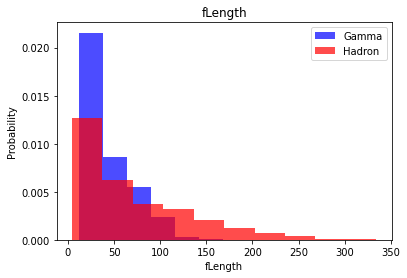

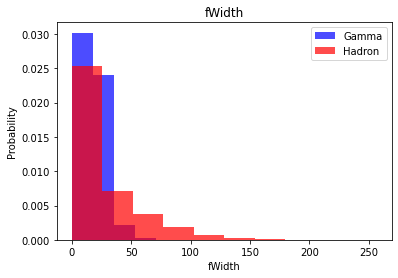

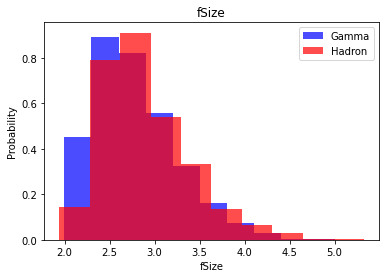

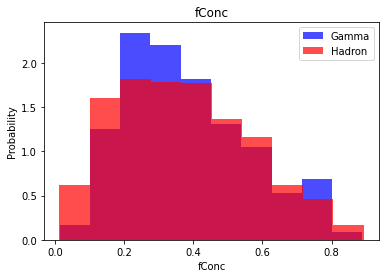

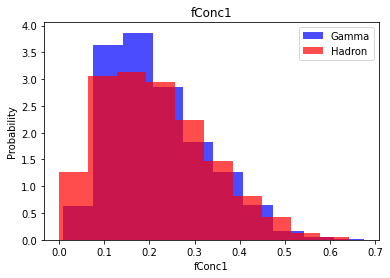

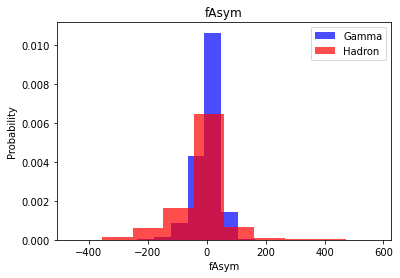

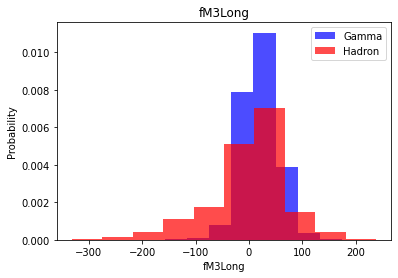

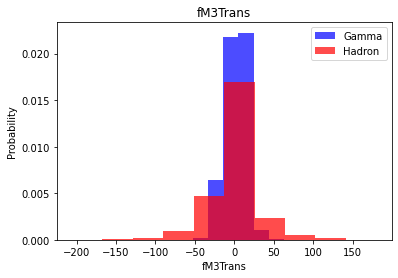

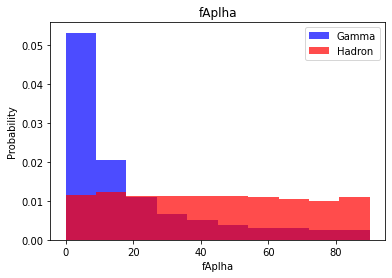

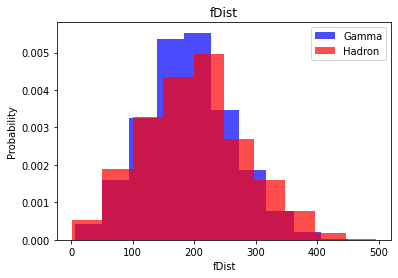

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color ="blue", label="Gamma", alpha = 0.7, density = True)
  plt.hist(df[df["class"]==0][label], color ="red", label ="Hadron", alpha = 0.7, density = True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

# Training, Validation and Test DataSets.

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

def scale_dataset(dataframe, oversample = False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  if oversample:
    ros = RandomOverSampler()
    x,y = ros.fit_resample(x, y)

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  data = np.hstack((x, np.reshape(y, (-1,1))))

  return data, x, y

In [ ]:
train, x_train, y_train = scale_dataset(train, oversample = True)
valid, x_valid, y_valid = scale_dataset(valid, oversample = False)
test, x_test, y_test = scale_dataset(test, oversample = False)

#kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74      1375
           1       0.87      0.83      0.85      2429

    accuracy                           0.81      3804
   macro avg       0.79      0.80      0.80      3804
weighted avg       0.81      0.81      0.81      3804



#Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [ ]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.44      0.52      1375
           1       0.73      0.85      0.79      2429

    accuracy                           0.70      3804
   macro avg       0.68      0.65      0.65      3804
weighted avg       0.69      0.70      0.69      3804



#Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [ ]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.76      0.71      1375
           1       0.85      0.78      0.81      2429

    accuracy                           0.77      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.78      0.77      0.77      3804



#Support Vector Machine Model

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [ ]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79      1375
           1       0.90      0.85      0.87      2429

    accuracy                           0.84      3804
   macro avg       0.83      0.84      0.83      3804
weighted avg       0.85      0.84      0.85      3804



#Nueral Netwrok (NN) Model


In [ ]:
import tensorflow as tf

In [ ]:
def plot_loss_accuracy(history):
  fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10,4))

  ax1.plot(history.history['loss'], label = 'loss')
  ax1.plot(history.history['val_loss'], label = 'val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary CrossEntropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label = 'accuracy_loss')
  ax2.plot(history.history['val_accuracy'], label = 'val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()


In [ ]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, epochs, batch_size):
      nn_model = tf.keras.Sequential([
                 tf.keras.layers.Dense(num_nodes, activation = 'relu', input_shape=(10,)),
                 tf.keras.layers.Dropout(dropout_prob),
                 tf.keras.layers.Dense(num_nodes, activation = 'relu'),
                 tf.keras.layers.Dropout(dropout_prob),
                 tf.keras.layers.Dense(1, activation = 'sigmoid')
                 ])
      nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr),loss = 'binary_crossentropy', metrics = ['accuracy'])
      history = nn_model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.2, verbose = False)

      return nn_model, history

Num_Nodes: 16, Dropout Prob: 0, LR: 0.01, Epochs: 100, Batch Size: 32


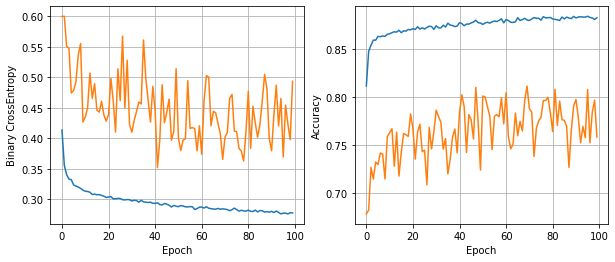

119/119 [==============================] - 0s 1ms/step - loss: 0.3377 - accuracy: 0.8649
Num_Nodes: 16, Dropout Prob: 0, LR: 0.01, Epochs: 100, Batch Size: 64


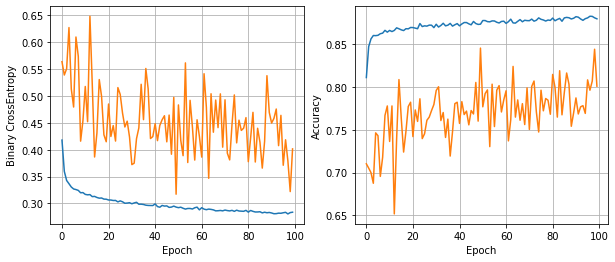

119/119 [==============================] - 0s 2ms/step - loss: 0.3312 - accuracy: 0.8578
Num_Nodes: 16, Dropout Prob: 0, LR: 0.01, Epochs: 100, Batch Size: 128


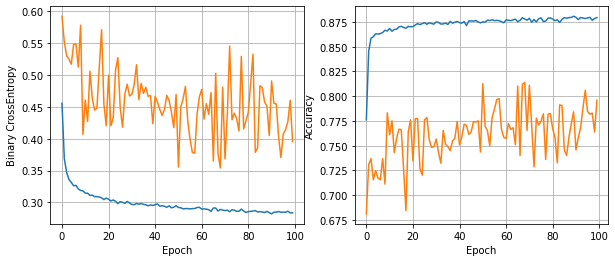

119/119 [==============================] - 0s 1ms/step - loss: 0.3388 - accuracy: 0.8544
Num_Nodes: 16, Dropout Prob: 0, LR: 0.005, Epochs: 100, Batch Size: 32


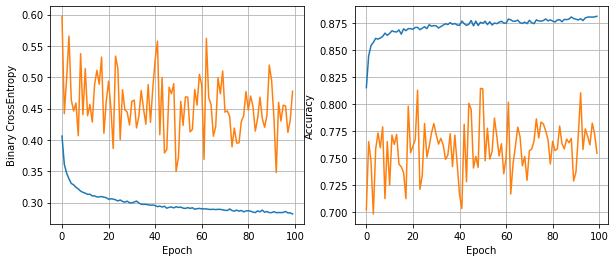

119/119 [==============================] - 0s 1ms/step - loss: 0.3166 - accuracy: 0.8657
Num_Nodes: 16, Dropout Prob: 0, LR: 0.005, Epochs: 100, Batch Size: 64


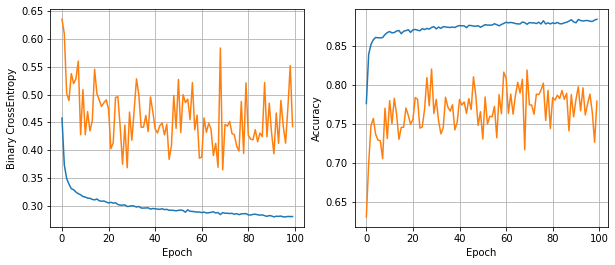

119/119 [==============================] - 0s 2ms/step - loss: 0.3192 - accuracy: 0.8670
Num_Nodes: 16, Dropout Prob: 0, LR: 0.005, Epochs: 100, Batch Size: 128


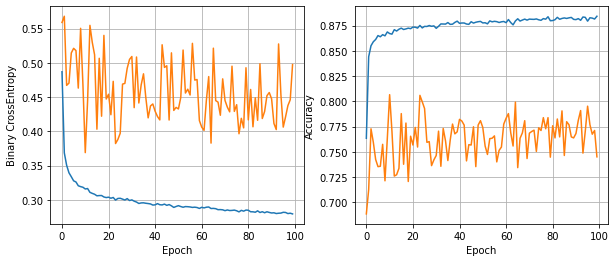

119/119 [==============================] - 0s 2ms/step - loss: 0.3378 - accuracy: 0.8659
Num_Nodes: 16, Dropout Prob: 0, LR: 0.001, Epochs: 100, Batch Size: 32


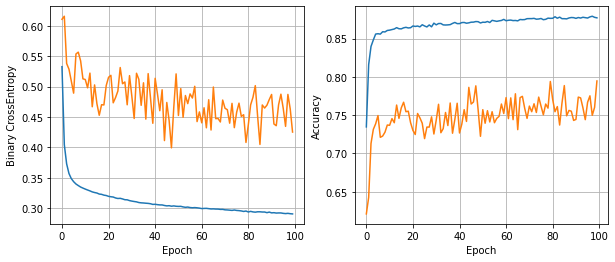

119/119 [==============================] - 0s 2ms/step - loss: 0.3166 - accuracy: 0.8638
Num_Nodes: 16, Dropout Prob: 0, LR: 0.001, Epochs: 100, Batch Size: 64


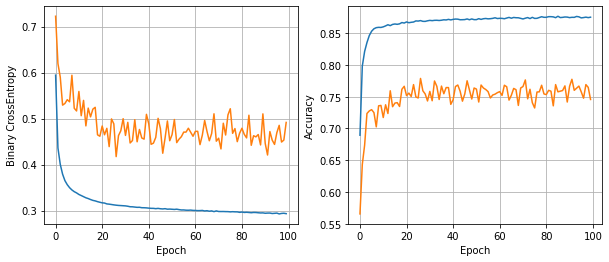

119/119 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.8709
Num_Nodes: 16, Dropout Prob: 0, LR: 0.001, Epochs: 100, Batch Size: 128


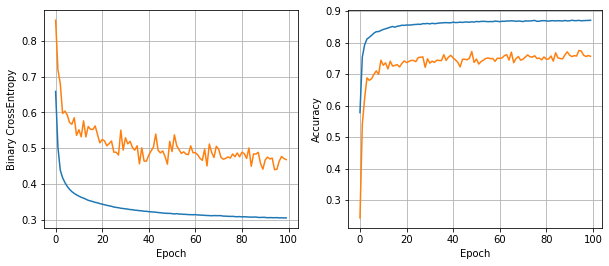

119/119 [==============================] - 0s 2ms/step - loss: 0.3300 - accuracy: 0.8651
Num_Nodes: 16, Dropout Prob: 0.2, LR: 0.01, Epochs: 100, Batch Size: 32


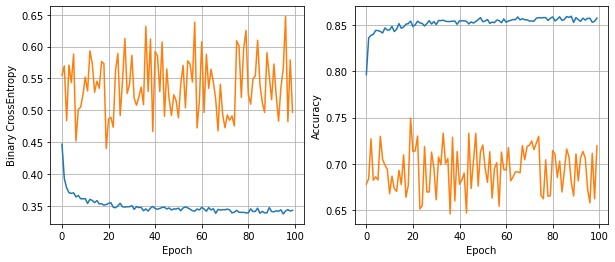

119/119 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.8688
Num_Nodes: 16, Dropout Prob: 0.2, LR: 0.01, Epochs: 100, Batch Size: 64


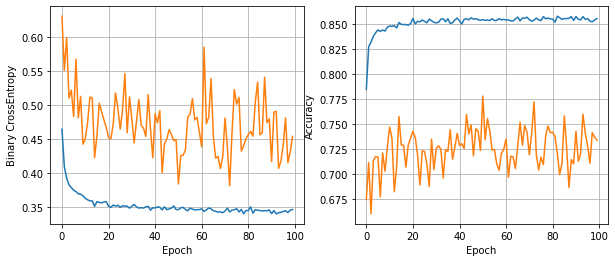

119/119 [==============================] - 0s 2ms/step - loss: 0.3349 - accuracy: 0.8699
Num_Nodes: 16, Dropout Prob: 0.2, LR: 0.01, Epochs: 100, Batch Size: 128


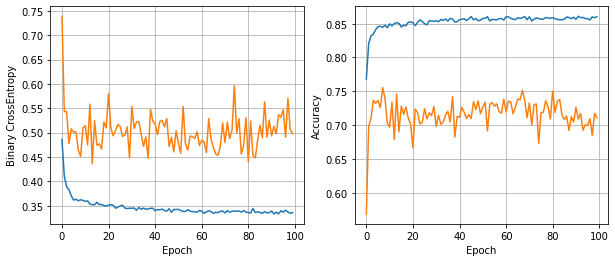

119/119 [==============================] - 0s 2ms/step - loss: 0.3219 - accuracy: 0.8680
Num_Nodes: 16, Dropout Prob: 0.2, LR: 0.005, Epochs: 100, Batch Size: 32


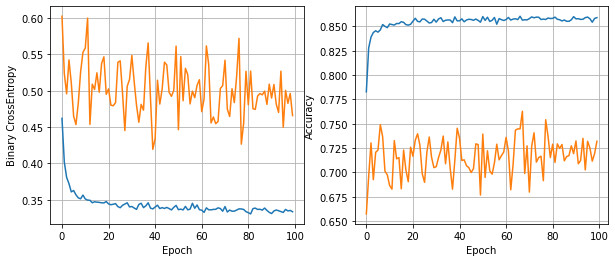

119/119 [==============================] - 0s 2ms/step - loss: 0.3172 - accuracy: 0.8717
Num_Nodes: 16, Dropout Prob: 0.2, LR: 0.005, Epochs: 100, Batch Size: 64


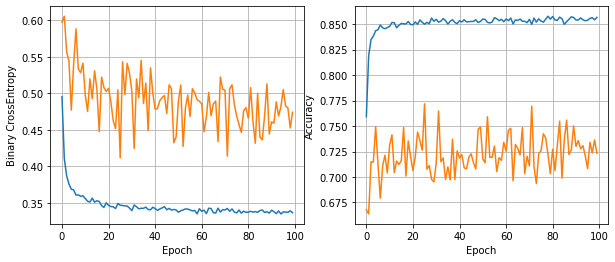

119/119 [==============================] - 0s 2ms/step - loss: 0.3298 - accuracy: 0.8725
Num_Nodes: 16, Dropout Prob: 0.2, LR: 0.005, Epochs: 100, Batch Size: 128


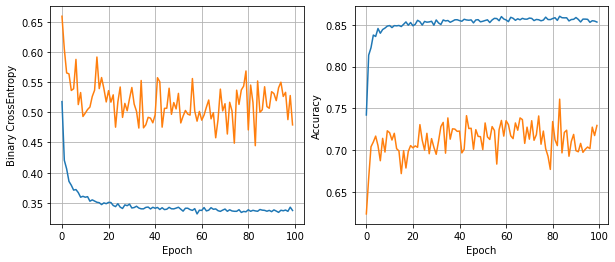

119/119 [==============================] - 0s 2ms/step - loss: 0.3329 - accuracy: 0.8691
Num_Nodes: 16, Dropout Prob: 0.2, LR: 0.001, Epochs: 100, Batch Size: 32


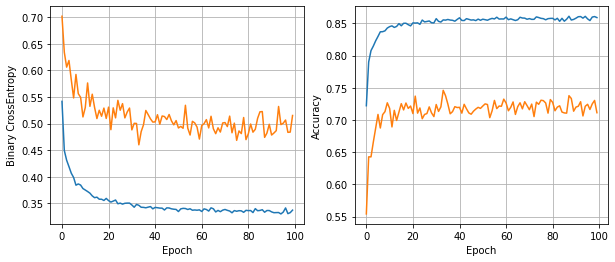

119/119 [==============================] - 0s 2ms/step - loss: 0.3190 - accuracy: 0.8704
Num_Nodes: 16, Dropout Prob: 0.2, LR: 0.001, Epochs: 100, Batch Size: 64


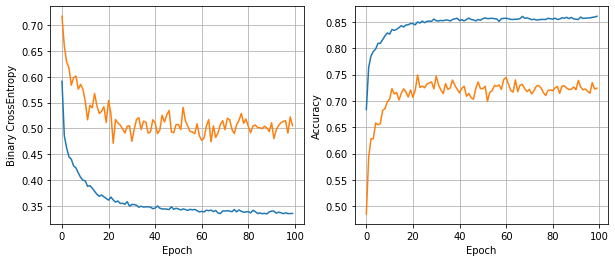

119/119 [==============================] - 0s 2ms/step - loss: 0.3200 - accuracy: 0.8722
Num_Nodes: 16, Dropout Prob: 0.2, LR: 0.001, Epochs: 100, Batch Size: 128


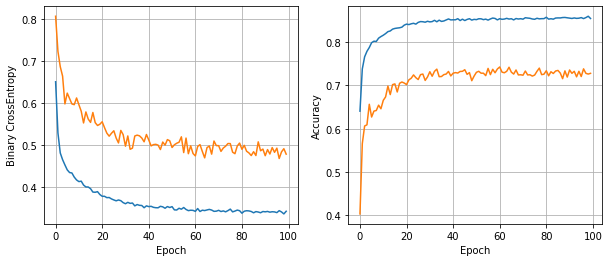

119/119 [==============================] - 0s 1ms/step - loss: 0.3274 - accuracy: 0.8709
Num_Nodes: 32, Dropout Prob: 0, LR: 0.01, Epochs: 100, Batch Size: 32


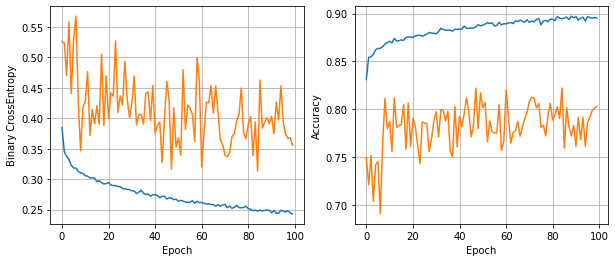

119/119 [==============================] - 0s 2ms/step - loss: 0.4747 - accuracy: 0.8470
Num_Nodes: 32, Dropout Prob: 0, LR: 0.01, Epochs: 100, Batch Size: 64


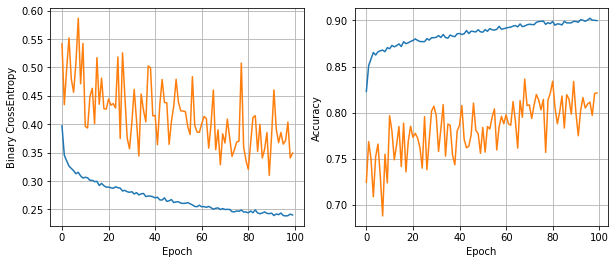

119/119 [==============================] - 0s 2ms/step - loss: 0.4501 - accuracy: 0.8425
Num_Nodes: 32, Dropout Prob: 0, LR: 0.01, Epochs: 100, Batch Size: 128


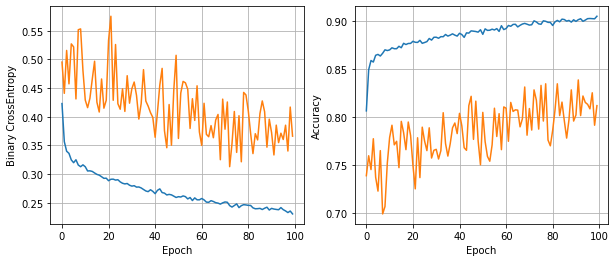

119/119 [==============================] - 0s 2ms/step - loss: 0.4045 - accuracy: 0.8565
Num_Nodes: 32, Dropout Prob: 0, LR: 0.005, Epochs: 100, Batch Size: 32


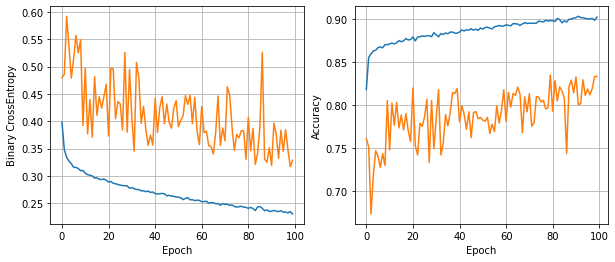

119/119 [==============================] - 0s 2ms/step - loss: 0.4853 - accuracy: 0.8425
Num_Nodes: 32, Dropout Prob: 0, LR: 0.005, Epochs: 100, Batch Size: 64


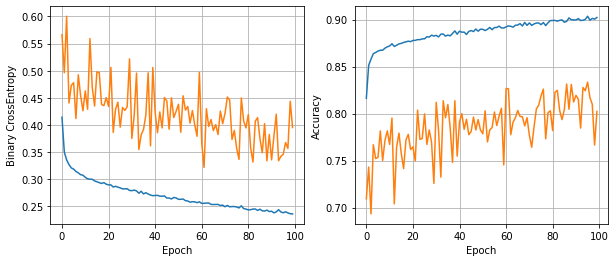

119/119 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8515
Num_Nodes: 32, Dropout Prob: 0, LR: 0.005, Epochs: 100, Batch Size: 128


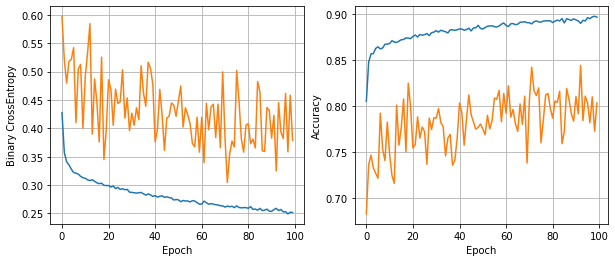

119/119 [==============================] - 0s 2ms/step - loss: 0.3619 - accuracy: 0.8609
Num_Nodes: 32, Dropout Prob: 0, LR: 0.001, Epochs: 100, Batch Size: 32


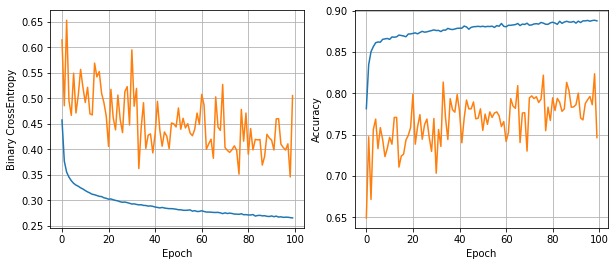

119/119 [==============================] - 0s 2ms/step - loss: 0.3387 - accuracy: 0.8615
Num_Nodes: 32, Dropout Prob: 0, LR: 0.001, Epochs: 100, Batch Size: 64


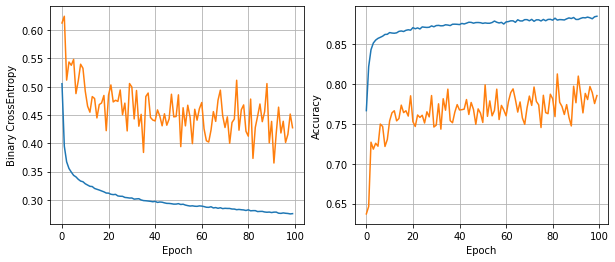

119/119 [==============================] - 0s 2ms/step - loss: 0.3190 - accuracy: 0.8683
Num_Nodes: 32, Dropout Prob: 0, LR: 0.001, Epochs: 100, Batch Size: 128


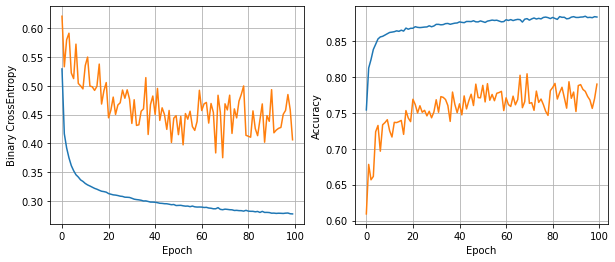

119/119 [==============================] - 0s 2ms/step - loss: 0.3382 - accuracy: 0.8623
Num_Nodes: 32, Dropout Prob: 0.2, LR: 0.01, Epochs: 100, Batch Size: 32


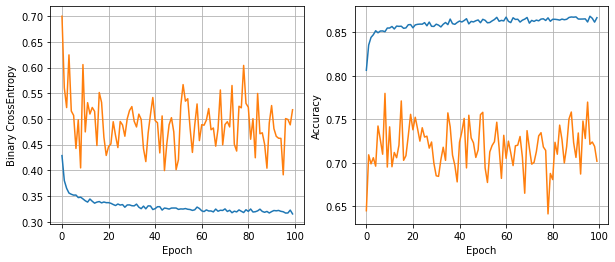

119/119 [==============================] - 0s 2ms/step - loss: 0.3324 - accuracy: 0.8688
Num_Nodes: 32, Dropout Prob: 0.2, LR: 0.01, Epochs: 100, Batch Size: 64


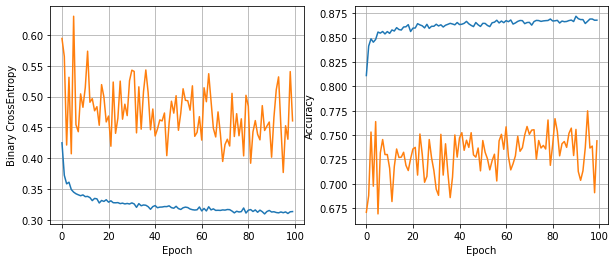

119/119 [==============================] - 0s 2ms/step - loss: 0.3169 - accuracy: 0.8646
Num_Nodes: 32, Dropout Prob: 0.2, LR: 0.01, Epochs: 100, Batch Size: 128


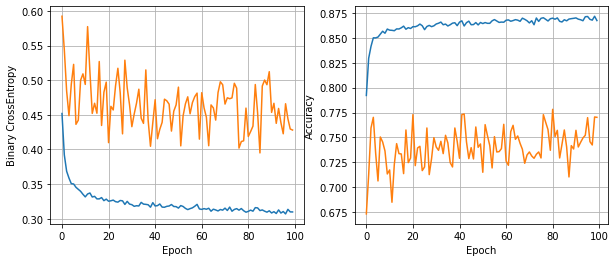

119/119 [==============================] - 0s 2ms/step - loss: 0.3238 - accuracy: 0.8709
Num_Nodes: 32, Dropout Prob: 0.2, LR: 0.005, Epochs: 100, Batch Size: 32


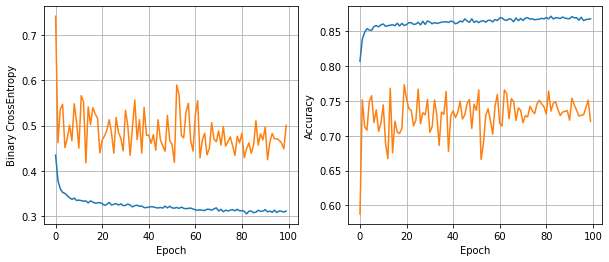

119/119 [==============================] - 0s 2ms/step - loss: 0.3149 - accuracy: 0.8725
Num_Nodes: 32, Dropout Prob: 0.2, LR: 0.005, Epochs: 100, Batch Size: 64


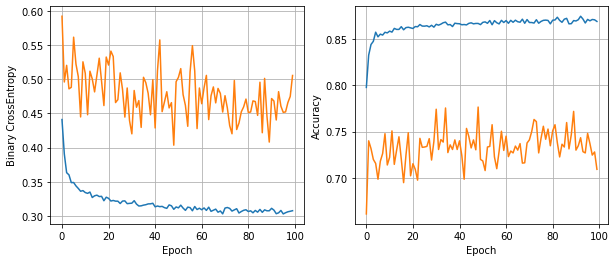

119/119 [==============================] - 0s 2ms/step - loss: 0.3147 - accuracy: 0.8693
Num_Nodes: 32, Dropout Prob: 0.2, LR: 0.005, Epochs: 100, Batch Size: 128


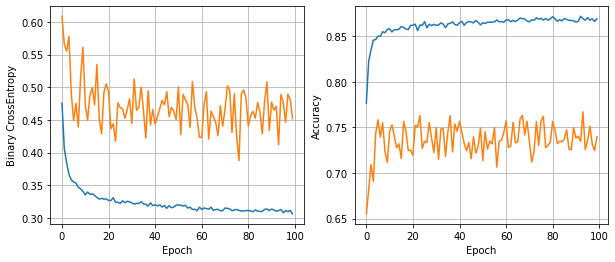

119/119 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.8691
Num_Nodes: 32, Dropout Prob: 0.2, LR: 0.001, Epochs: 100, Batch Size: 32


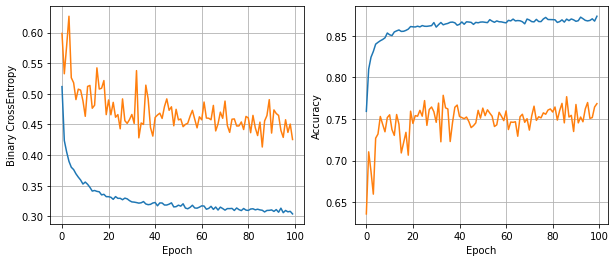

119/119 [==============================] - 0s 3ms/step - loss: 0.3156 - accuracy: 0.8701
Num_Nodes: 32, Dropout Prob: 0.2, LR: 0.001, Epochs: 100, Batch Size: 64


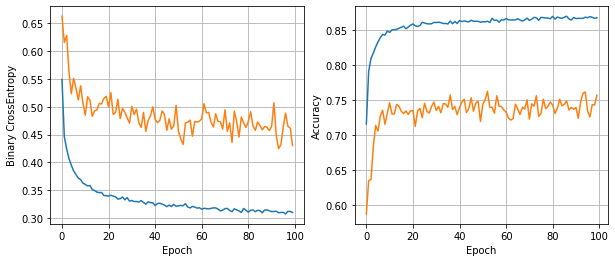

119/119 [==============================] - 0s 3ms/step - loss: 0.3156 - accuracy: 0.8717
Num_Nodes: 32, Dropout Prob: 0.2, LR: 0.001, Epochs: 100, Batch Size: 128


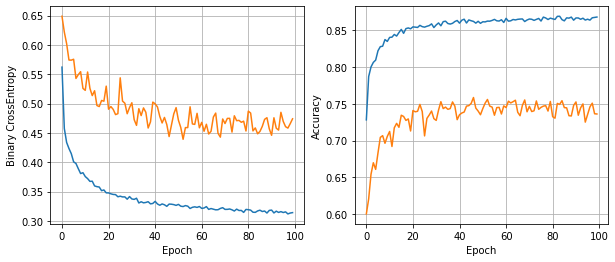

119/119 [==============================] - 0s 2ms/step - loss: 0.3084 - accuracy: 0.8715
Num_Nodes: 64, Dropout Prob: 0, LR: 0.01, Epochs: 100, Batch Size: 32


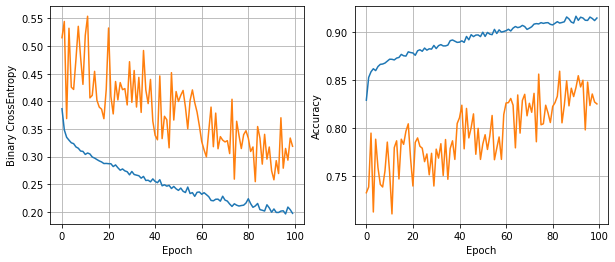

119/119 [==============================] - 0s 2ms/step - loss: 0.5997 - accuracy: 0.8536
Num_Nodes: 64, Dropout Prob: 0, LR: 0.01, Epochs: 100, Batch Size: 64


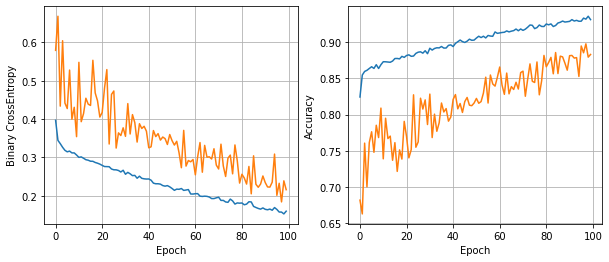

119/119 [==============================] - 0s 3ms/step - loss: 0.6674 - accuracy: 0.8346
Num_Nodes: 64, Dropout Prob: 0, LR: 0.01, Epochs: 100, Batch Size: 128


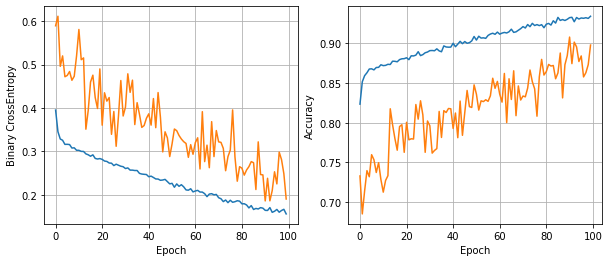

119/119 [==============================] - 0s 2ms/step - loss: 0.7279 - accuracy: 0.8349
Num_Nodes: 64, Dropout Prob: 0, LR: 0.005, Epochs: 100, Batch Size: 32


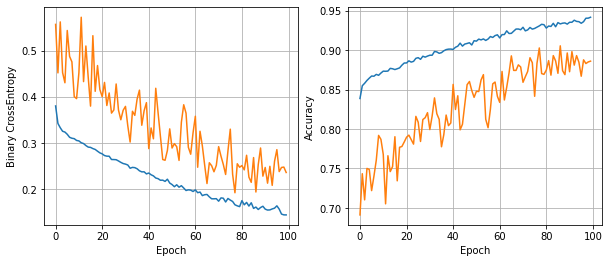

119/119 [==============================] - 0s 2ms/step - loss: 0.7026 - accuracy: 0.8391
Num_Nodes: 64, Dropout Prob: 0, LR: 0.005, Epochs: 100, Batch Size: 64


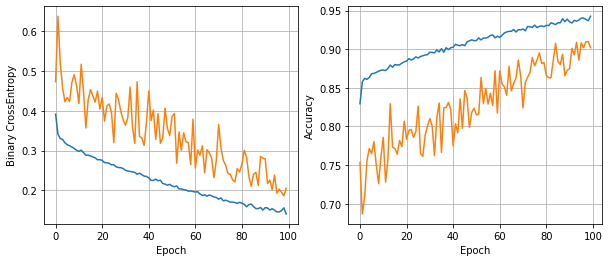

119/119 [==============================] - 0s 2ms/step - loss: 0.7386 - accuracy: 0.8381
Num_Nodes: 64, Dropout Prob: 0, LR: 0.005, Epochs: 100, Batch Size: 128


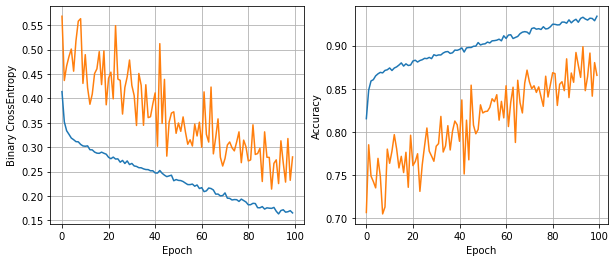

119/119 [==============================] - 0s 2ms/step - loss: 0.6012 - accuracy: 0.8460
Num_Nodes: 64, Dropout Prob: 0, LR: 0.001, Epochs: 100, Batch Size: 32


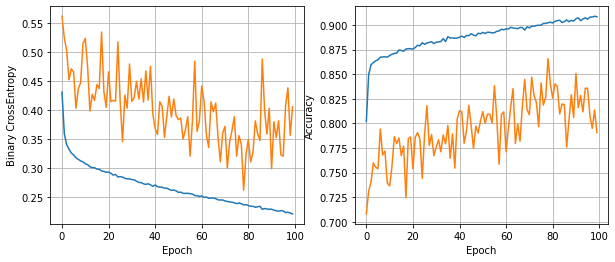

119/119 [==============================] - 0s 2ms/step - loss: 0.3560 - accuracy: 0.8644
Num_Nodes: 64, Dropout Prob: 0, LR: 0.001, Epochs: 100, Batch Size: 64


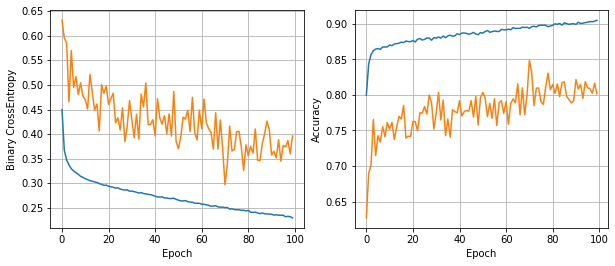

119/119 [==============================] - 0s 2ms/step - loss: 0.3424 - accuracy: 0.8646
Num_Nodes: 64, Dropout Prob: 0, LR: 0.001, Epochs: 100, Batch Size: 128


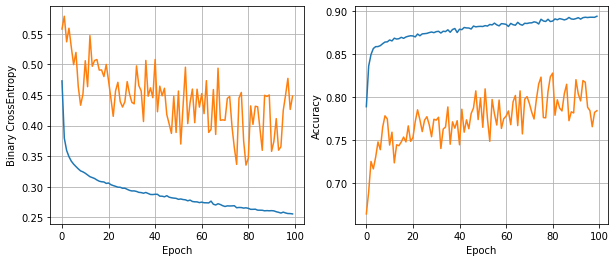

119/119 [==============================] - 0s 2ms/step - loss: 0.3239 - accuracy: 0.8678
Num_Nodes: 64, Dropout Prob: 0.2, LR: 0.01, Epochs: 100, Batch Size: 32


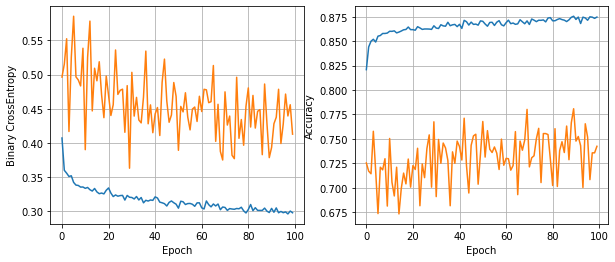

119/119 [==============================] - 0s 2ms/step - loss: 0.3328 - accuracy: 0.8699
Num_Nodes: 64, Dropout Prob: 0.2, LR: 0.01, Epochs: 100, Batch Size: 64


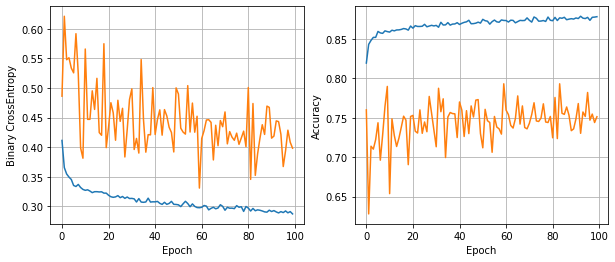

119/119 [==============================] - 0s 3ms/step - loss: 0.3505 - accuracy: 0.8625
Num_Nodes: 64, Dropout Prob: 0.2, LR: 0.01, Epochs: 100, Batch Size: 128


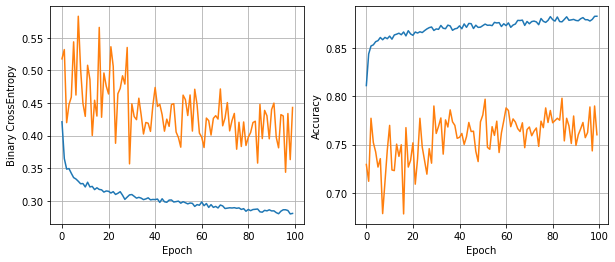

119/119 [==============================] - 0s 3ms/step - loss: 0.3230 - accuracy: 0.8733
Num_Nodes: 64, Dropout Prob: 0.2, LR: 0.005, Epochs: 100, Batch Size: 32


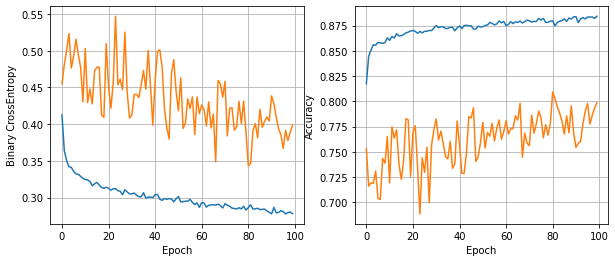

119/119 [==============================] - 0s 2ms/step - loss: 0.3258 - accuracy: 0.8675
Num_Nodes: 64, Dropout Prob: 0.2, LR: 0.005, Epochs: 100, Batch Size: 64


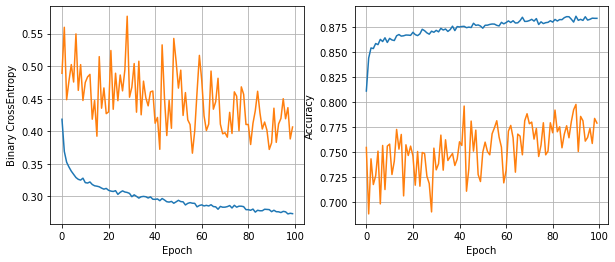

119/119 [==============================] - 0s 3ms/step - loss: 0.3229 - accuracy: 0.8693
Num_Nodes: 64, Dropout Prob: 0.2, LR: 0.005, Epochs: 100, Batch Size: 128


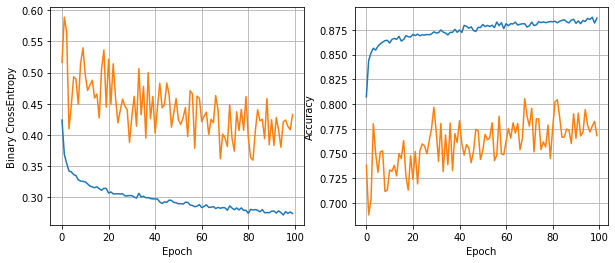

119/119 [==============================] - 0s 2ms/step - loss: 0.3131 - accuracy: 0.8728
Num_Nodes: 64, Dropout Prob: 0.2, LR: 0.001, Epochs: 100, Batch Size: 32


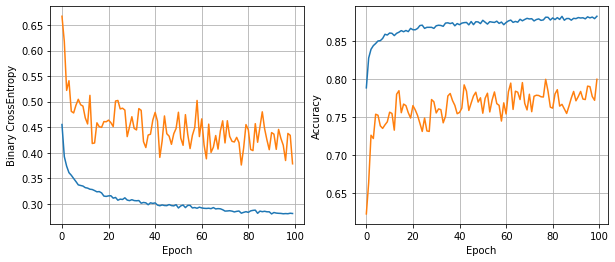

119/119 [==============================] - 0s 3ms/step - loss: 0.3140 - accuracy: 0.8609
Num_Nodes: 64, Dropout Prob: 0.2, LR: 0.001, Epochs: 100, Batch Size: 64


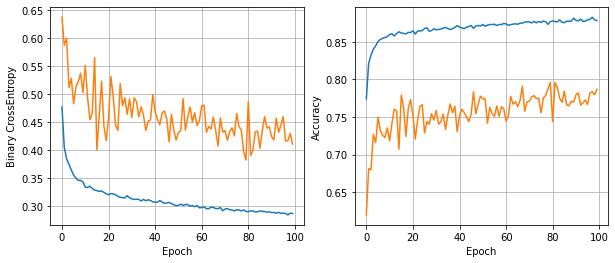

119/119 [==============================] - 0s 2ms/step - loss: 0.3075 - accuracy: 0.8715
Num_Nodes: 64, Dropout Prob: 0.2, LR: 0.001, Epochs: 100, Batch Size: 128


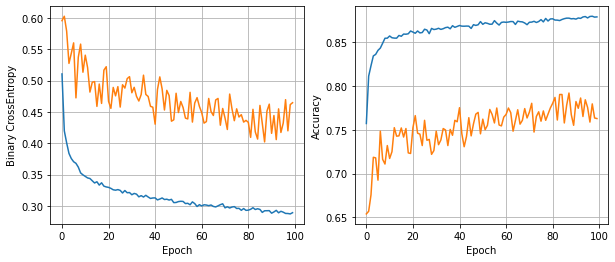

119/119 [==============================] - 0s 3ms/step - loss: 0.3004 - accuracy: 0.8712


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100

for num_nodes in [16,32,64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32,64,128]:
        print(f'Num_Nodes: {num_nodes}, Dropout Prob: {dropout_prob}, LR: {lr}, Epochs: {epochs}, Batch Size: {batch_size}')
        model,history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, epochs, batch_size)
        plot_loss_accuracy(history)
        val_loss = model.evaluate(x_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model



In [ ]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
y_pred

119/119 [==============================] - 0s 2ms/step


array([1, 1, 0, ..., 1, 1, 0])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1375
           1       0.88      0.92      0.90      2429

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804

